In [2]:
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [3]:


# Definir las coordenadas del punto de interés
latitude = 28.6208
longitude = 77.3909

# Crear un punto a partir de las coordenadas
point = Point(longitude, latitude)

# Crear un buffer de 100 km alrededor del punto
buffer_distance = 100 * 1000  # 100 km en metros
buffer = gpd.GeoSeries([point]).buffer(buffer_distance)

# Descargar datos de OSM de la región alrededor del punto
tags = {'natural': 'water'}  # Buscamos cuerpos de agua naturales
waterbodies = ox.features_from_point((latitude, longitude), tags=tags, dist=buffer_distance)
waterbodies.water.unique()
# lakes = waterbodies[waterbodies['water']=='lake']
# lakes = lakes[['name', 'geometry']]




c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 15 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


array([nan, 'pond', 'reservoir', 'lake', 'basin', 'canal', 'river',
       'ditch', 'wastewater', 'fishpond', 'fountain', 'stream', 'pool',
       'drain', 'oxbow', 'Fountain', 'stream_pool', 'natural',
       'waterlogging'], dtype=object)

In [74]:
lakes = lakes[lakes['geometry'].notna()]
lakes = lakes[lakes.geometry.is_valid]

In [75]:
lakes

name  \
element_type osmid             
way          1189450891  NaN   
             1097606634  NaN   
             1097607681  NaN   
             1097607682  NaN   
             1097607688  NaN   
...                      ...   
             1164249378  NaN   
             1164249379  NaN   
             1164249380  NaN   
             1164253589  NaN   
             1164253590  NaN   

                                                                  geometry  
element_type osmid                                                          
way          1189450891  POLYGON ((76.69278 28.51080, 76.69309 28.51095...  
             1097606634  POLYGON ((76.42874 29.09150, 76.42886 29.09158...  
             1097607681  POLYGON ((76.43714 29.11673, 76.43716 29.11678...  
             1097607682  POLYGON ((76.43402 29.12070, 76.43395 29.12116...  
             1097607688  POLYGON ((76.43993 29.12082, 76.43997 29.12086...  
...                                                                    ...  
             1164249378  POLYGON ((78.05159 28.82543, 78.05194 28.82592...  
             1164249379  POLYGON ((78.05356 28.82549, 78.05358 28.82535...  
             1164249380  POLYGON ((78.05353 28.82465, 78.05370 28.82467...  
             1164253589  POLYGON ((78.05045 28.79840, 78.05038 28.79881...  
             1164253590  POLYGON ((78.05742 28.81270, 78.05745 28.81260...  

[204 rows x 2 columns]

In [76]:
lakes["geometry_lat_long"] = lakes["geometry"]

In [77]:
lakes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [78]:
if lakes.crs is None:
    lakes.set_crs(epsg=4326, inplace=True)  # Asume que las coordenadas están en EPSG:4326 (lat/lon)

# Cambiar a una proyección métrica si es necesario para cálculos
lakes = lakes.to_crs(epsg=32643) #modificar para encontrar la proyección adecuada

In [79]:
lakes['area'] = lakes.geometry.area
lakes['centroid'] = lakes.geometry.centroid

In [80]:
lakes = lakes.sort_values(by='area', ascending=False)

In [81]:
lakes['centroid'] = lakes['centroid'].to_crs(epsg=4326)

In [82]:
lakes

name  \
element_type osmid                      
way          1188795043  Yamuna River   
             143476055   Damdama Lake   
             76849338     Sanjay Lake   
             1189073160           NaN   
             1189131925       marshes   
...                               ...   
             1225692426           NaN   
             1225455450           NaN   
             1225460646           NaN   
             1225701504           NaN   
             846059046            NaN   

                                                                  geometry  \
element_type osmid                                                           
way          1188795043  POLYGON ((729572.793 3156718.213, 729369.518 3...   
             143476055   POLYGON ((708946.985 3134283.050, 708932.287 3...   
             76849338    POLYGON ((723968.578 3167722.534, 723985.210 3...   
             1189073160  POLYGON ((698360.628 3176910.929, 698360.954 3...   
             1189131925  POLYGON ((680567.134 3173862.801, 680628.740 3...   
...                                                                    ...   
             1225692426  POLYGON ((719701.333 3143084.103, 719708.907 3...   
             1225455450  POLYGON ((690240.337 3140784.312, 690239.689 3...   
             1225460646  POLYGON ((703876.559 3143167.199, 703878.435 3...   
             1225701504  POLYGON ((718429.100 3142590.664, 718445.243 3...   
             846059046   POLYGON ((702435.696 3169308.014, 702435.207 3...   

                                                         geometry_lat_long  \
element_type osmid                                                           
way          1188795043  POLYGON ((77.34583 28.51699, 77.34375 28.51695...   
             143476055   POLYGON ((77.13114 28.31809, 77.13099 28.31796...   
             76849338    POLYGON ((77.29075 28.61721, 77.29092 28.61726...   
             1189073160  POLYGON ((77.03057 28.70427, 77.03054 28.70213...   
             1189131925  POLYGON ((76.84802 28.67938, 76.84865 28.67936...   
...                                                                    ...   
             1225692426  POLYGON ((77.24243 28.39571, 77.24250 28.39561...   
             1225455450  POLYGON ((76.94150 28.37958, 76.94150 28.37983...   
             1225460646  POLYGON ((77.08101 28.39903, 77.08103 28.39887...   
             1225701504  POLYGON ((77.22936 28.39148, 77.22952 28.39155...   
             846059046   POLYGON ((77.07092 28.63506, 77.07091 28.63483...   

                                  area                   centroid  
element_type osmid                                                 
way          1188795043  474867.159739  POINT (77.34984 28.50710)  
             143476055   472996.955361  POINT (77.13102 28.30546)  
             76849338    192852.712917  POINT (77.30209 28.61500)  
             1189073160  182998.624591  POINT (77.03429 28.70344)  
             1189131925  172469.133783  POINT (76.85169 28.67849)  
...                                ...                        ...  
             1225692426     835.094785  POINT (77.24260 28.39576)  
             1225455450     783.406175  POINT (76.94159 28.37965)  
             1225460646     594.714961  POINT (77.08106 28.39887)  
             1225701504     556.613300  POINT (77.22957 28.39149)  
             846059046      498.788765  POINT (77.07101 28.63494)  

[204 rows x 5 columns]

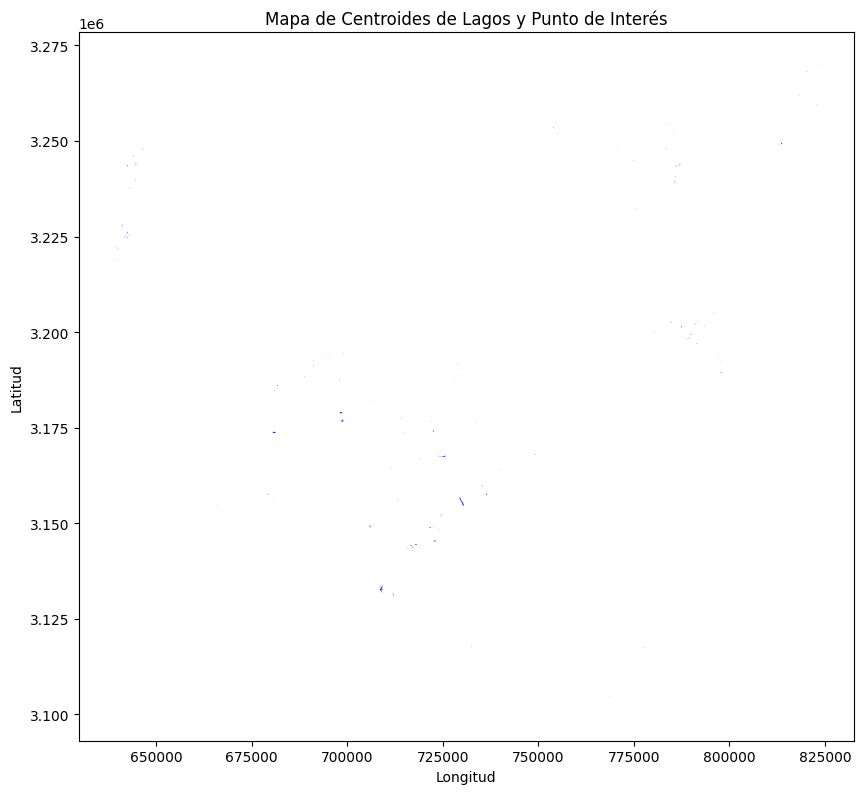

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear los centroides de los lagos en azul
lakes.plot(ax=ax, color='blue', markersize=50, label='Centroides de Lagos')

# Plotear el punto de interés en rojo
# point.plot(ax=ax, color='red', markersize=100, label='Punto de Interés')

# Añadir una leyenda
# plt.legend()

# Mostrar el mapa
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Mapa de Centroides de Lagos y Punto de Interés')
plt.show()

In [ ]:
# # Filtrar lagos específicos si es necesario
# lakes = waterbodies[waterbodies['water'] == 'lake']

# Convertir el punto de interés en un GeoDataFrame
point_gdf = gpd.GeoDataFrame(geometry=[point], crs='EPSG:4326')

# Reproyectar ambos GeoDataFrames a una proyección métrica (por ejemplo, UTM)
lakes = lakes.to_crs(epsg=32643)  # EPSG:32643 es UTM zona 43N, que cubre India del norte
point_gdf = point_gdf.to_crs(epsg=32643)

# Calcular distancias desde el punto a los lagos
lakes['distance'] = lakes.geometry.apply(lambda x: point_gdf.distance(x).min())

# Filtrar lagos dentro de 100 km
lakes_within_100km = lakes[lakes['distance'] <= buffer_distance]

# Calcular el área de cada lago
lakes_within_100km['area'] = lakes_within_100km.geometry.area / 10**6  # Área en km²

# Mostrar los lagos encontrados con sus áreas
print(lakes_within_100km.geometry)